In [1]:
import pandas as pd
filepath = 'https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/12%EC%A3%BC%EC%B0%A8/data/data1.tsv'

In [3]:
data = pd.read_csv(filepath,sep='\t')
data

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [4]:
print(data.shape)
print('-'*100)
print(data.info())

(4622, 5)
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [5]:
print(data.columns)
print('-'*100)
print(data.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
----------------------------------------------------------------------------------------------------
RangeIndex(start=0, stop=4622, step=1)


id는 숫자의 의미를 갖지 않기 때문에 str로 변환합니다

In [8]:
data['order_id'] = data['order_id'].astype(str)
# 요약통계
print(data.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


범주형피처는 unique함수로 개수 파악

In [9]:
len(data['order_id'].unique()), len(data['item_name'].unique())

(1834, 50)

가장 많이 주문한 item - top10

item당 주문의 총량

In [16]:
item_count = data['item_name'].value_counts()[:10]
for idx, (name,cnt) in enumerate(item_count.items()):
  print(f"Top{idx+1} : {name} {cnt}")

Top1 : Chicken Bowl 726
Top2 : Chicken Burrito 553
Top3 : Chips and Guacamole 479
Top4 : Steak Burrito 368
Top5 : Canned Soft Drink 301
Top6 : Steak Bowl 211
Top7 : Chips 211
Top8 : Bottled Water 162
Top9 : Chicken Soft Tacos 115
Top10 : Chips and Fresh Tomato Salsa 110


item당 주문 개수와 총량

In [20]:
# item당 주문의 개수
order_count = data.groupby('item_name')['order_id'].count()
order_count[:5]

item_name
6 Pack Soft Drink        54
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    11
Barbacoa Salad Bowl      10
Name: order_id, dtype: int64

In [21]:
# item당 주문의 총량
item_quantity = data.groupby('item_name')['quantity'].count()
item_quantity[:5]

item_name
6 Pack Soft Drink        54
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    11
Barbacoa Salad Bowl      10
Name: quantity, dtype: int64

현재까지의 데이터를 가지고 시각화

In [23]:
import numpy as np
import matplotlib.pyplot as plt

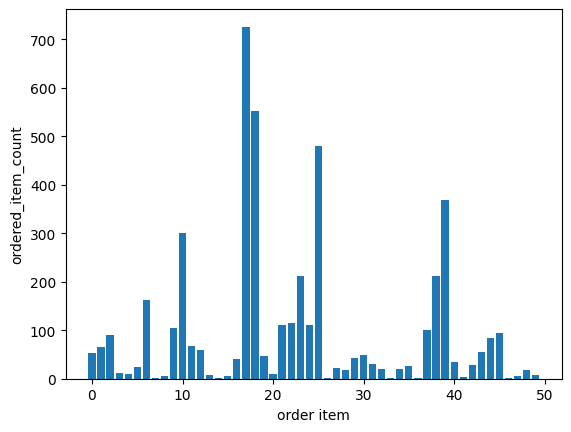

In [24]:
item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.xlabel('order item')
plt.show()

데이터 전처리
- apply, lambda

In [25]:
data.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [26]:
data['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [27]:
data['item_price'] = data['item_price'].apply(lambda x: float(x[1:]))
data.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


주문당 평균 계산금액 출력

In [29]:
data.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [30]:
data.groupby('order_id')['item_price'].sum().describe()

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

한 주문에 10달러 이상 사용한 주문번호(id) 출력

In [34]:
data_orderid_group = data.groupby('order_id').sum()
result = data_orderid_group[data_orderid_group.item_price >= 10]
print(result[:10])
print(result.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


<ipython-input-34-856be8bdf890>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_orderid_group = data.groupby('order_id').sum()


각 아이템의 가격 구하기

In [45]:
data_one_item = data[data.quantity == 1]
data_per_item = data_one_item.groupby('item_name').min()
data_per_item.sort_values(by='item_price', ascending=False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


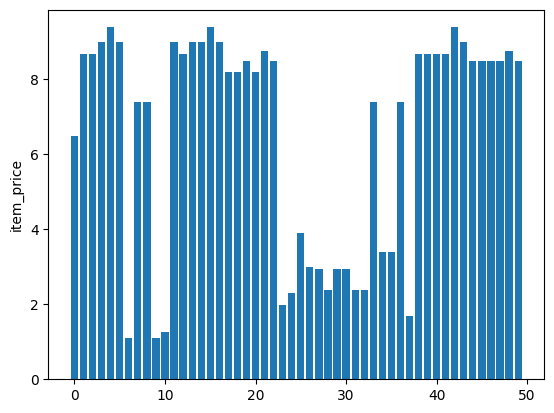

In [47]:
# 아이템 가격 분포 그래프로 출력
item_name_list = data_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = data_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align='center')
plt.ylabel('item_price')
plt.show()

아이템 가격 히스토그램

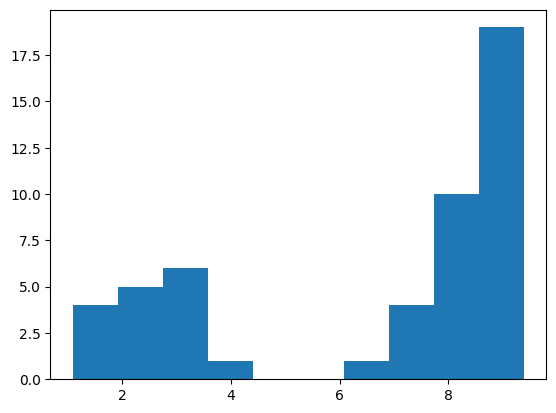

In [48]:
plt.hist(item_price)
plt.show()

가장 비싼 주문에서 item이 총 몇 개 팔렸는지

In [49]:
data.groupby('order_id').sum().sort_values(by='item_price', ascending=False)

<ipython-input-49-24237fd35011>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('order_id').sum().sort_values(by='item_price', ascending=False)


,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30
...,...,...
1014,2,10.08
730,2,10.08
14,2,10.08
